# Data analysis

In [38]:
from database.load_data import load_sql
import pandas as pd

In [53]:
df = load_sql("spotify_dataset")
df[:10]

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
index,,,,,,,,,,,,,,,,,,,,,
0,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
5,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",2021-03-31,...,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab
6,3,16,2021-05-14--2021-05-21,Kiss Me More (feat. SZA),"29,356,736",Doja Cat,8640063,748mdHapucXQri7IAO8yFK,"['dance pop', 'pop']",2021-04-09,...,0.762,0.701,-3.541,0.0286,0.235,0.123,110.968,208867,0.742,G#/Ab
7,2,10,2021-06-18--2021-06-25,Todo De Ti,"26,951,613",Rauw Alejandro,6080597,4fSIb4hdOQ151TILNsSEaF,"['puerto rican pop', 'trap latino']",2021-05-20,...,0.78,0.718,-3.605,0.0506,0.31,0.0932,127.949,199604,0.342,D#/Eb
8,3,8,2021-06-18--2021-06-25,Yonaguni,"25,030,128",Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,"['latin', 'reggaeton', 'trap latino']",2021-06-04,...,0.644,0.648,-4.601,0.118,0.276,0.135,179.951,206710,0.44,C#/Db


In [54]:
import numpy as np

df.replace('', np.nan, inplace=True)
df.replace(' ', np.nan, inplace=True)
df.dropna(inplace=True)
ds = df[df!=u'']
df['Streams'] = df['Streams'].apply(lambda val: int(val.replace(',', '')))

In [56]:
df.filter(
    items=['Highest Charting Position', 'Number of Times Charted', 'Streams', 'Artist Followers',
           'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
           'Liveness', 'Tempo', 'Duration (ms)', 'Valence']
).values

array([[1, 8, 48633449, ..., '134.002', '211560', '0.589'],
       [2, 3, 47248719, ..., '169.928', '141806', '0.478'],
       [1, 11, 40162559, ..., '166.928', '178147', '0.688'],
       ...,
       [197, 1, 4620876, ..., '104.988', '217307', '0.394'],
       [198, 1, 4607385, ..., '154.064', '152784', '0.881'],
       [199, 1, 4595450, ..., '205.272', '221307', '0.422']], dtype=object)

zrozumienie danych – centralność, rozproszenie, rozkłady, wstępne zależności między danymi itd

In [65]:
from sklearn.preprocessing import StandardScaler

attributes = ['Highest Charting Position', 'Number of Times Charted', 'Streams', 'Artist Followers',
           'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
           'Liveness', 'Tempo', 'Duration (ms)', 'Valence']

x_norm = StandardScaler().fit_transform(df.filter(items=attributes).values)
x_norm[:10]

array([[-1.49407017, -0.16382249, 12.53480478, -0.68019646,  1.89081775,
         0.16856452,  1.03083214,  0.61410923, -0.66386693, -0.48630169,
         1.23449673,  0.37830986,  0.28894808,  0.32693295],
       [-1.47686238, -0.46898978, 12.12443046, -0.74904547,  1.82760228,
        -0.69521216,  0.80795602,  0.34462212, -0.6828978 , -0.84075451,
        -0.54298032,  1.59278472, -1.19097065, -0.1615115 ],
       [-1.49407017,  0.01927788, 10.02439794, -0.50691006,  1.82760228,
        -0.89184425,  0.18885566,  0.52002793,  0.27498953,  0.34488418,
        -0.6686535 ,  1.49137002, -0.41995069,  0.7625726 ],
       [-1.4596546 , -0.34692287,  9.32407602,  4.1136694 ,  1.76438681,
         0.82868653,  1.63135949,  1.05102918, -0.80523914, -0.80638817,
         1.26921308,  0.10868197,  0.70226196,  0.33573375],
       [-1.42523903, -0.5910567 ,  8.18280494, -0.55447637,  1.63795586,
         0.32306116,  0.4364958 , -0.42277833, -0.56327516, -0.91268406,
        -0.91027929,  0.91

In [62]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(x_norm)

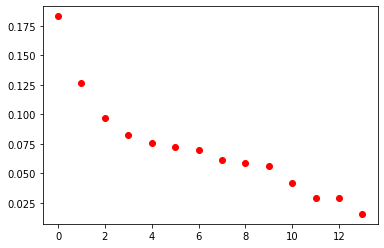

In [64]:
import matplotlib.pyplot as plt

variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()

In [66]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print('Attribute, PC1, PC2')
for i in range(0,pc1.shape[0]):
    print(f'{attributes[i]}: {repr(pc1[i])}: {repr(pc2[i])}')

Attribute, PC1, PC2
Highest Charting Position: -0.07421572928302979: -0.5552337368716342
Number of Times Charted: 0.02944171014922281: 0.4336132519535397
Streams: 0.03902361969698093: 0.3040716954136884
Artist Followers: 0.0979771901911419: 0.3425459950868115
Popularity: -0.0890620210466474: 0.41557945233011057
Danceability: -0.3143972756387481: -0.0830174574745253
Energy: -0.5262305806758598: 0.07186981126421589
Loudness: -0.5135342944068259: 0.13171066654885136
Speechiness: -0.11203164255433368: -0.18999935463364306
Acousticness: 0.4466066596474045: -0.05844705294596371
Liveness: -0.040126996243276376: -0.02686585937852027
Tempo: -0.10243799877860804: -0.041362806560744855
Duration (ms): 0.0021559684567322634: 0.21801611547986616
Valence: -0.3331247325702871: -0.04803171904808192


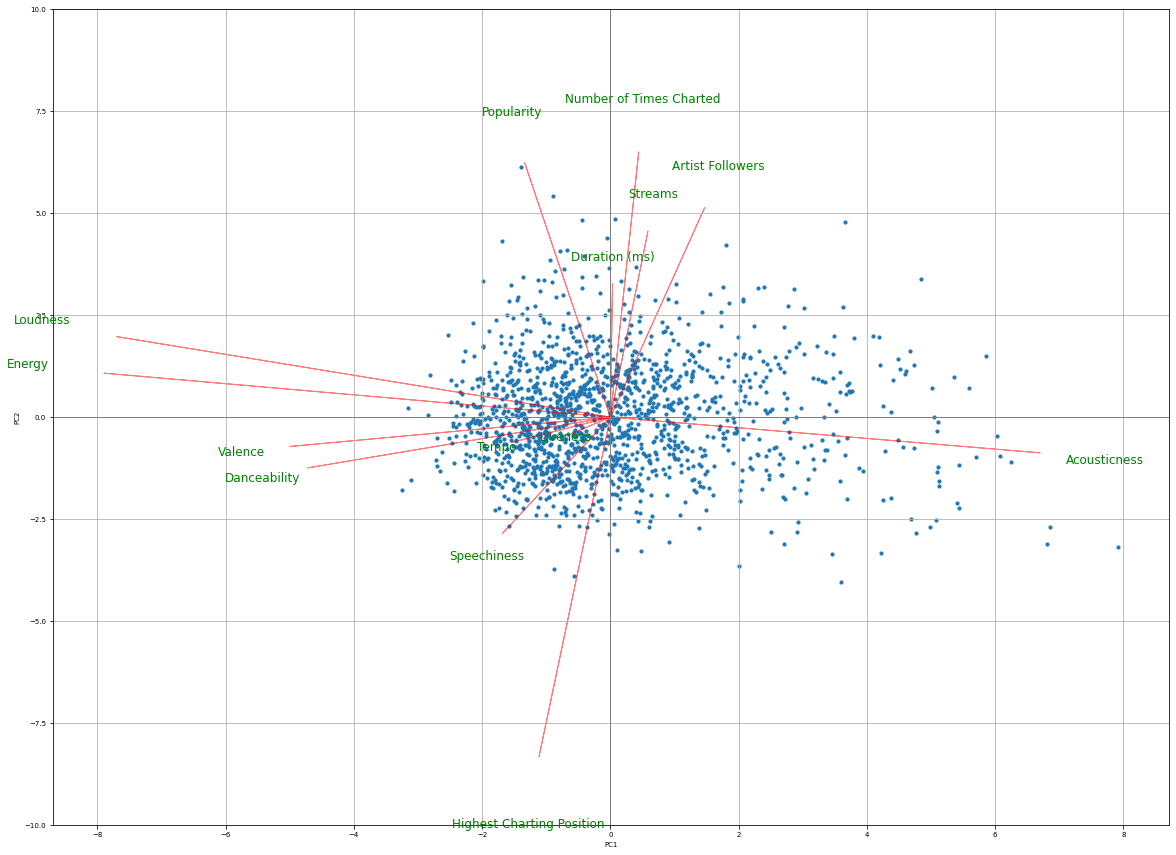

In [71]:
sign = lambda x: (1, -1)[x<0]
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams.update({'font.size': 7})

fig, ax = plt.subplots()
ax.scatter(X_pca[:,0], X_pca[:,1], s=10)

plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

# for txt, xy in zip(df['Song Name'], zip(X_pca[:,0], X_pca[:,1])):
#     ax.annotate(txt, (xy[0], xy[1]))

def myplot(score,coeff,labels=None):
    scale = 15
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    for i in range(n):
        plt.arrow(0, 0, scale*coeff[i,0], scale*coeff[i,1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(scale * coeff[i,0] * sign(i) * 1.15, scale * coeff[i,1] * 1.15,
                     "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(scale * coeff[i,0] * sign(i) * 1.15, scale * coeff[i,1] * sign(i) * 1.2,
                     labels[i], color = 'g', ha = 'center', va = 'center')
    # plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.rcParams.update({'font.size': 12})
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]), attributes)